--------
Name: Jasween Kaur Brar

Roll No: 102017187

SubGroup: 3CS8

Assignment 5: Parameter Optimisation of SVM

---

In [74]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import random
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
# TASK-1 -> Download dataset
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [77]:
df.shape ## We get no. of rows and columns in dataset

(8124, 23)

In [78]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [79]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [80]:
# TASK-2 -> Pre-Process the Dataset
df['class'] = LabelEncoder().fit_transform(df['class'])

df['cap-shape'] = LabelEncoder().fit_transform(df['cap-shape'])
df['cap-color'] = LabelEncoder().fit_transform(df['cap-color'])
df['cap-surface'] = LabelEncoder().fit_transform(df['cap-surface'])

df['odor'] = LabelEncoder().fit_transform(df['odor'])

df['bruises'] = LabelEncoder().fit_transform(df['bruises'])

df['population'] = LabelEncoder().fit_transform(df['population'])

df['spore-print-color'] = LabelEncoder().fit_transform(df['spore-print-color'])

df['veil-type'] = LabelEncoder().fit_transform(df['veil-type'])
df['veil-color'] = LabelEncoder().fit_transform(df['veil-color'])

df['ring-type'] = LabelEncoder().fit_transform(df['ring-type'])
df['ring-number'] = LabelEncoder().fit_transform(df['ring-number'])

df['habitat'] = LabelEncoder().fit_transform(df['habitat'])

df['gill-spacing'] = LabelEncoder().fit_transform(df['gill-spacing'])
df['gill-color'] = LabelEncoder().fit_transform(df['gill-color'])
df['gill-attachment'] = LabelEncoder().fit_transform(df['gill-attachment'])
df['gill-size'] = LabelEncoder().fit_transform(df['gill-size'])

df['stalk-shape'] = LabelEncoder().fit_transform(df['stalk-shape'])
df['stalk-root'] = LabelEncoder().fit_transform(df['stalk-root'])
df['stalk-shape'] = LabelEncoder().fit_transform(df['stalk-shape'])
df['stalk-surface-below-ring'] = LabelEncoder().fit_transform(df['stalk-surface-below-ring'])
df['stalk-surface-above-ring'] = LabelEncoder().fit_transform(df['stalk-surface-above-ring'])
df['stalk-color-above-ring'] = LabelEncoder().fit_transform(df['stalk-color-above-ring'])
df['stalk-color-below-ring'] = LabelEncoder().fit_transform(df['stalk-color-below-ring'])

df['ring-number'] = LabelEncoder().fit_transform(df['ring-number'])

In [81]:
print(df['class'].value_counts())

0    4208
1    3916
Name: class, dtype: int64


In [82]:
# TASK-3 -> Generate 10 different samples
sample_dict = {}
for i in range (10):
    sample_dict['S'+str(i+1)] = df.sample(frac=0.25,replace=False)

sample_dict

{'S1':       class  cap-shape  cap-surface  cap-color  bruises  odor  \
 5326      1          5            3          4        0     7   
 7005      0          3            2          8        0     5   
 6427      1          2            3          2        0     7   
 7388      0          3            2          4        0     5   
 5805      1          5            2          3        1     2   
 ...     ...        ...          ...        ...      ...   ...   
 6525      1          5            2          4        0     2   
 3531      1          5            2          8        0     1   
 3218      1          5            2          3        0     1   
 2263      0          5            3          2        1     5   
 7189      1          5            2          2        0     8   
 
       gill-attachment  gill-spacing  gill-size  gill-color  ...  \
 5326                1             0          1           0  ...   
 7005                1             1          0           7  ...

In [83]:
# TASK-4 -> Divide the dataset into 70-30 for training and testing

# TASK-5 -> Optimise the SVM for every sample with 10 iterations and report the best parmeters

kernel_list = ['linear','poly','rbf','sigmoid']
best_kernel = ''
best_accuracy = 0
best_C = 0
best_gamma = 0
result_dict = {}

for key, value in sample_dict.items():
    sample_df = value
    X = sample_df.drop('class',axis=1)
    feature_name = X.columns
    y = sample_df['class']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    for iter in range(1000):
        kernel = random.choice(kernel_list)
       
        C = random.uniform(0,1)
        gamma = random.uniform(0,1)
        model = SVC(kernel=kernel,C=C,gamma=gamma,max_iter=1)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_kernel = kernel
            best_C = C
            best_gamma = gamma
            best_sample_df = sample_df
    result_dict[key] = {'accuracy' : best_accuracy, 'kernel' : best_kernel, 'C' : best_C, 'gamma' : best_gamma}
    print('Best accuracy for sample ',key,' is ',best_accuracy)


Best accuracy for sample  S1  is  0.6163934426229508
Best accuracy for sample  S2  is  0.6163934426229508
Best accuracy for sample  S3  is  0.6163934426229508
Best accuracy for sample  S4  is  0.6163934426229508
Best accuracy for sample  S5  is  0.6163934426229508
Best accuracy for sample  S6  is  0.6163934426229508
Best accuracy for sample  S7  is  0.6163934426229508
Best accuracy for sample  S8  is  0.6163934426229508
Best accuracy for sample  S9  is  0.6770491803278689
Best accuracy for sample  S10  is  0.6770491803278689


In [84]:
for i in result_dict:
    print("{}\t{}".format(i,result_dict[i]))

S1	{'accuracy': 0.6163934426229508, 'kernel': 'poly', 'C': 0.13299061799464973, 'gamma': 0.008615209175179994}
S2	{'accuracy': 0.6163934426229508, 'kernel': 'poly', 'C': 0.13299061799464973, 'gamma': 0.008615209175179994}
S3	{'accuracy': 0.6163934426229508, 'kernel': 'poly', 'C': 0.13299061799464973, 'gamma': 0.008615209175179994}
S4	{'accuracy': 0.6163934426229508, 'kernel': 'poly', 'C': 0.13299061799464973, 'gamma': 0.008615209175179994}
S5	{'accuracy': 0.6163934426229508, 'kernel': 'poly', 'C': 0.13299061799464973, 'gamma': 0.008615209175179994}
S6	{'accuracy': 0.6163934426229508, 'kernel': 'poly', 'C': 0.13299061799464973, 'gamma': 0.008615209175179994}
S7	{'accuracy': 0.6163934426229508, 'kernel': 'poly', 'C': 0.13299061799464973, 'gamma': 0.008615209175179994}
S8	{'accuracy': 0.6163934426229508, 'kernel': 'poly', 'C': 0.13299061799464973, 'gamma': 0.008615209175179994}
S9	{'accuracy': 0.6770491803278689, 'kernel': 'linear', 'C': 0.5435394698575824, 'gamma': 0.02586322575229505}
S

In [85]:
keys = [key for key in result_dict]
values = [result_dict[key] for key in result_dict]

In [86]:
final_df = pd.DataFrame(data=[keys, values], index=['Accuracy', 'Parameters']).T
final_df

,Accuracy,Parameters
0,S1,"{'accuracy': 0.6163934426229508, 'kernel': 'po..."
1,S2,"{'accuracy': 0.6163934426229508, 'kernel': 'po..."
2,S3,"{'accuracy': 0.6163934426229508, 'kernel': 'po..."
3,S4,"{'accuracy': 0.6163934426229508, 'kernel': 'po..."
4,S5,"{'accuracy': 0.6163934426229508, 'kernel': 'po..."
5,S6,"{'accuracy': 0.6163934426229508, 'kernel': 'po..."
6,S7,"{'accuracy': 0.6163934426229508, 'kernel': 'po..."
7,S8,"{'accuracy': 0.6163934426229508, 'kernel': 'po..."
8,S9,"{'accuracy': 0.6770491803278689, 'kernel': 'li..."
9,S10,"{'accuracy': 0.6770491803278689, 'kernel': 'li..."


In [87]:
# TASK-6 -> Plot the convergence graph for the sample with maximum accuracy
iterations = list()
acc_list = list()
x_train, x_test, y_train, y_test = train_test_split(best_sample_df.drop('class', axis=1), best_sample_df['class'], test_size=0.3, random_state=42)
x_train = StandardScaler().fit_transform(x_train)

for i in range(100):
    x = i+1
    svm = SVC(C=2, degree=1, gamma=0.1, kernel='rbf', max_iter=x)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)
    iterations.append(x)

In [88]:
iterations = np.array(iterations)
acc_list = np.array(acc_list)

In [89]:
print(iterations.shape)
print(acc_list.shape)

(100,)
(100,)


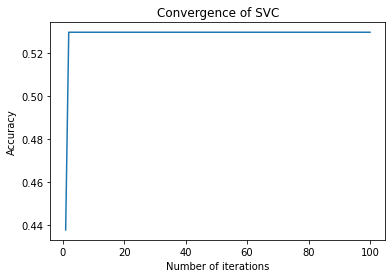

In [90]:
plt.plot(iterations, acc_list)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVC')
plt.show()